In [44]:
import xarray as xr 
import threddsclient
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
# Get the ACTRIS NRT thredds catalog
all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/actris_nrt/catalog.xml')

In [6]:
opendap_urls = [x for x in all_opendap_urls if 'NO0002' in x]
opendap_urls

['https://thredds.nilu.no/thredds/dodsC/actris_nrt/NO0002R.20231121150000.20231202083605.aerosol_mass_spectrometer...11d.1h.NO01L_Aerodyne_Q-ACSM_140-144_NRT.NO01L_Aerodyne_Q-ACSM_BIR.lev1.5.nc']

In [7]:
ds = xr.open_dataset(opendap_urls[0])
ds

<xarray.Dataset>
Dimensions:                                                (time: 238,
                                                            tbnds: 2,
                                                            metadata_time: 95,
                                                            Location: 1,
                                                            pressure_qc_flags: 1,
                                                            ammonium_ug_N_per_m3_amean_qc_flags: 1,
                                                            ...
                                                            organic_mass_amean_Fraction_qc_flags: 1,
                                                            organic_mass_uncertainty_Fraction_qc_flags: 1,
                                                            sulphate_total_ug_S_per_m3_amean_qc_flags: 1,
                                                            sulphate_total_ug_per_m3_amean_qc_flags: 1,
                                                            sulphate_total_ug_S_per_m3_uncertainty_qc_flags: 1,
                                                            sulphate_total_ug_per_m3_uncertainty_qc_flags: 1)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * metadata_time                                          (metadata_time) datetime64[ns] ...
  * Location                                               (Location) |S64 b'...
  * Fraction                                               (Fraction) |S64 b'...
  * Fractionx                                              (Fractionx) |S64 b...
Dimensions without coordinates: tbnds, pressure_qc_flags,
                                ammonium_ug_N_per_m3_amean_qc_flags,
                                ammonium_ug_per_m3_amean_qc_flags,
                                ammonium_ug_N_per_m3_uncertainty_qc_flags,
                                ammonium_ug_per_m3_uncertainty_qc_flags,
                                chloride_amean_qc_flags,
                                ...
                                organic_mass_amean_Fraction_qc_flags,
                                organic_mass_uncertainty_Fraction_qc_flags,
                                sulphate_total_ug_S_per_m3_amean_qc_flags,
                                sulphate_total_ug_per_m3_amean_qc_flags,
                                sulphate_total_ug_S_per_m3_uncertainty_qc_flags,
                                sulphate_total_ug_per_m3_uncertainty_qc_flags
Data variables: (12/71)
    time_bnds                                              (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                     (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                            (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                  (Location, metadata_time) |S64 ...
    ammonium_ug_N_per_m3_amean                             (time) float64 ...
    ammonium_ug_N_per_m3_amean_qc                          (ammonium_ug_N_per_m3_amean_qc_flags, time) float64 ...
    ...                                                     ...
    nitrate_ug_N_per_m3_amean_Fraction                     (Fraction, time) float64 ...
    nitrate_ug_per_m3_amean_Fraction                       (Fraction, time) float64 ...
    nitrate_ug_N_per_m3_uncertainty_Fraction               (Fraction, time) float64 ...
    nitrate_ug_per_m3_uncertainty_Fraction                 (Fraction, time) float64 ...
    organic_mass_amean_Fraction                            (Fractionx, time) float64 ...
    organic_mass_uncertainty_Fraction                      (Fractionx, time) float64 ...
Attributes: (12/108)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of a...
    keywords:                          mass_concentration_of_nitrate

In [8]:
ds.time.min(),ds.time.max()

(<xarray.DataArray 'time' ()>
 array('2023-11-21T15:30:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()>
 array('2023-12-02T07:30:00.000000000', dtype='datetime64[ns]'))

# QA data

In [9]:
# Get the EBAS thredds catalog
all_opendap_urls_ebas = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

In [10]:
opendap_urls = [x for x in all_opendap_urls_ebas if 'NO0002' in x]
opendap_urls = [x for x in opendap_urls if 'aerosol_mass_spectrometer' in x]
opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20191016000000.20200519131143.aerosol_mass_spectrometer..pm1_non_refractory.6mo.1h.NO01L_Aerodyne_Q-ACSM_140-144.NO01L_Ng_2011.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20120808140000.20200205000000.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.6y.1h.NO01L_Aerodyne_Q-ACSM_140-144.NO01L_Ng_2011.lev2.nc']

In [11]:
ds1 = xr.open_dataset(opendap_urls[0])
ds2 = xr.open_dataset(opendap_urls[1])

In [16]:
ds2

<xarray.Dataset>
Dimensions:                                  (time: 56073, tbnds: 2,
                                              metadata_time: 1, Fraction: 3,
                                              organic_mass_amean_qc_flags: 1,
                                              nitrate_amean_qc_flags: 1,
                                              ammonium_uncertainty_qc_flags: 1,
                                              sulphate_total_amean_qc_flags: 1,
                                              nitrate_uncertainty_qc_flags: 1,
                                              organic_mass_uncertainty_qc_flags: 1,
                                              ammonium_amean_qc_flags: 1,
                                              sulphate_total_uncertainty_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 2012-08-08...
  * metadata_time                            (metadata_time) datetime64[ns] 2...
  * Fraction                                 (Fraction) |S64 b'Org_43' ... b'...
Dimensions without coordinates: tbnds, organic_mass_amean_qc_flags,
                                nitrate_amean_qc_flags,
                                ammonium_uncertainty_qc_flags,
                                sulphate_total_amean_qc_flags,
                                nitrate_uncertainty_qc_flags,
                                organic_mass_uncertainty_qc_flags,
                                ammonium_amean_qc_flags,
                                sulphate_total_uncertainty_qc_flags
Data variables: (12/26)
    time_bnds                                (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] ...
    ammonium_amean_ebasmetadata              (metadata_time) |S64 b'{\n    "R...
    organic_mass_amean_ebasmetadata          (metadata_time) |S64 b'{\n    "R...
    sulphate_total_amean                     (time) float64 ...
    organic_mass_amean_qc                    (organic_mass_amean_qc_flags, time) float64 ...
    ...                                       ...
    sulphate_total_uncertainty_ebasmetadata  (metadata_time) |S64 b'{\n    "R...
    organic_mass_uncertainty_ebasmetadata    (Fraction, metadata_time) |S64 b...
    organic_mass_amean                       (time) float64 ...
    ammonium_amean                           (time) float64 ...
    nitrate_uncertainty_ebasmetadata         (metadata_time) |S64 b'{\n    "R...
    organic_mass_uncertainty                 (Fraction, time) float64 ...
Attributes: (12/52)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of organ...
    keywords:                      COLOSSAL, mass_concentration_of_ammonium_i...
    id:                            NO0002R.20120808140000.20200205000000.aero...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [12]:
ds1.time.min(),ds1.time.max()

(<xarray.DataArray 'time' ()>
 array('2019-10-16T00:30:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()>
 array('2020-04-15T23:30:00.000000000', dtype='datetime64[ns]'))

In [13]:
ds2.time.min(),ds2.time.max()

(<xarray.DataArray 'time' ()>
 array('2012-08-08T14:30:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()>
 array('2018-12-31T22:30:00.000000000', dtype='datetime64[ns]'))

In [19]:
ds1_SO4 = ds1.sulphate_total_amean.groupby('time.dayofyear').mean()
ds1_Org = ds1.organic_mass_amean.groupby('time.dayofyear').mean()
ds1_NH4 = ds1.ammonium_amean.groupby('time.dayofyear').mean()
ds1_NO3 = ds1.nitrate_amean.groupby('time.dayofyear').mean()

In [25]:
ds2_SO4 = ds2.sulphate_total_amean.groupby('time.dayofyear').mean()

In [26]:
ds2_Org = ds2.organic_mass_amean.groupby('time.dayofyear').mean()

In [27]:
ds2_NH4 = ds2.ammonium_amean.groupby('time.dayofyear').mean()

In [28]:
ds2_NO3 = ds2.nitrate_amean.groupby('time.dayofyear').mean()

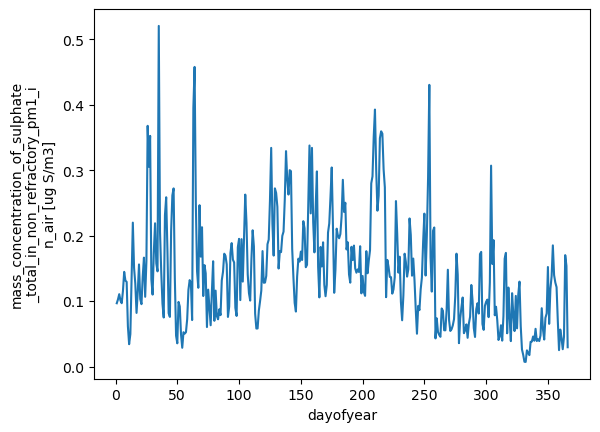

In [66]:
ds2_SO4.plot()
plt.savefig('SO4_2012-2018.png')

In [63]:
ds_SO4 = xr.concat([ds1_SO4,ds2_SO4],dim='time').mean(dim='time')
ds_SO4

<xarray.DataArray 'sulphate_total_amean' (dayofyear: 366)>
array([0.08128008, 0.12354129, 0.06169758, 0.05425249, 0.05621243,
       0.06554347, 0.08553534, 0.07600021, 0.07163477, 0.03296757,
       0.02867855, 0.03090723, 0.08376798, 0.13267732, 0.08895469,
       0.08265991, 0.09859721, 0.11437662, 0.156     , 0.10305208,
       0.0953125 , 0.07100892, 0.08738558, 0.05551638, 0.0881767 ,
       0.22428845, 0.19628213, 0.18536519, 0.07014342, 0.05920331,
       0.09767737, 0.12070014, 0.08345622, 0.07731668, 0.2643868 ,
       0.10608614, 0.0738015 , 0.05288115, 0.143334  , 0.13263489,
       0.13286163, 0.09202046, 0.04304577, 0.04177859, 0.11456404,
       0.16157861, 0.14521935, 0.07927482, 0.03002521, 0.02183607,
       0.05576921, 0.05301475, 0.03009601, 0.01779478, 0.03249411,
       0.03247261, 0.02969395, 0.04623961, 0.070292  , 0.08236251,
       0.0751169 , 0.05683262, 0.21192609, 0.23449773, 0.13610765,
       0.08711786, 0.0856166 , 0.14276164, 0.11837102, 0.12856397,
       0.06728338, 0.09064272, 0.08081352, 0.05372249, 0.09074673,
       0.05759773, 0.0596167 , 0.06462916, 0.08946377, 0.04723178,
       0.06608112, 0.06193032, 0.08648101, 0.12499112, 0.14190017,
       0.16265127, 0.13515874, 0.09690902, 0.09693823, 0.08866239,
       0.0495493 , 0.05966027, 0.10641626, 0.11021795, 0.10449825,
       0.16457843, 0.20573373, 0.09355737, 0.15372082, 0.13842163,
...
       0.05434722, 0.05695775, 0.06279167, 0.07247222, 0.10770833,
       0.17244444, 0.14035443, 0.03572917, 0.07360185, 0.09039167,
       0.10545833, 0.05091667, 0.0553875 , 0.06437805, 0.04389815,
       0.06546667, 0.07600833, 0.12460833, 0.0523859 , 0.02923092,
       0.0415541 , 0.05051572, 0.04924466, 0.04850533, 0.11374083,
       0.12663248, 0.08833557, 0.05103641, 0.04765252, 0.05250016,
       0.05536946, 0.04167399, 0.06872172, 0.15528256, 0.09787748,
       0.16149148, 0.06158616, 0.05115799, 0.04197446, 0.03035755,
       0.0382173 , 0.04691107, 0.02872933, 0.04938104, 0.09339802,
       0.12121296, 0.06380696, 0.07271047, 0.06550623, 0.02682573,
       0.06048215, 0.04236246, 0.02830734, 0.06635518, 0.03861526,
       0.08096137, 0.16350432, 0.04295815, 0.01941385, 0.01289268,
       0.00630577, 0.00390973, 0.01578226, 0.01541314, 0.01297377,
       0.02148758, 0.0211008 , 0.05598479, 0.03889215, 0.03413287,
       0.02299361, 0.0266486 , 0.02443494, 0.03437304, 0.05527361,
       0.03546061, 0.07110724, 0.11766943, 0.04511857, 0.08859474,
       0.04337143, 0.118375  , 0.13785612, 0.18513194, 0.13972222,
       0.12829457, 0.12124306, 0.07009677, 0.02505   , 0.0565    ,
       0.04393277, 0.02646667, 0.0454    , 0.08511927, 0.08118581,
       0.02945833])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

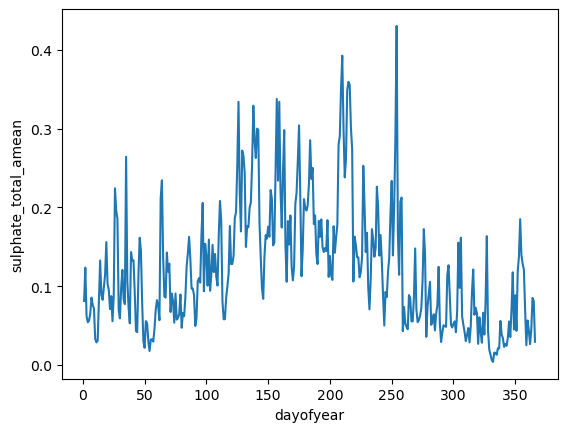

In [64]:
ds_SO4.plot()

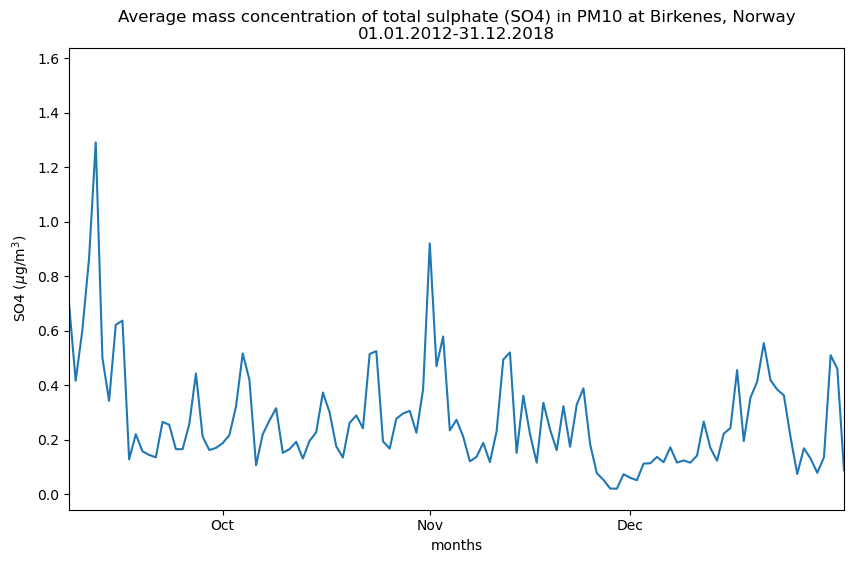

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ds2_SO4.dayofyear,ds2_SO4*3)
#plt.xticks([datetime.date.fromordinal(datetime.date(2020, 1, 1).toordinal() + d - 1) for d in ds2_SO4.dayofyear.values])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ticks = ax.get_xticks()[:12]
ax.set_xticks(ticks)
ax.set_xlim(250,366)
ax.set_xlabel(r'months') 
ax.set_ylabel(r'SO4 ($\mu$g/m$^3$)')
ax.set_title('Average mass concentration of total sulphate (SO4) in PM10 at Birkenes, Norway\n01.01.2012-31.12.2018')
plt.savefig('SO4_sammenlignbart_ACSM.png',dpi=300)

In [30]:
ds1_SO4

<xarray.DataArray 'sulphate_total_amean' (dayofyear: 183)>
array([ 6.58591325e-02,  1.44405496e-01,  1.28162224e-02,  7.71331208e-03,
        1.56748617e-02,  1.55869415e-02,  2.64073213e-02,  2.07304279e-02,
        1.38841145e-02,  4.31409021e-03,  2.32321092e-02,  1.21828811e-02,
        3.46817875e-02,  4.54692217e-02,  2.70656213e-02,  3.86485875e-02,
        1.15263858e-01,             nan,             nan,             nan,
                   nan,  4.72617778e-03,  8.37531958e-03,  4.45984654e-03,
        1.51000721e-02,  8.07812009e-02,  8.72489417e-02,  1.82970416e-02,
        6.82850354e-03,  8.50036038e-03,  2.03339001e-02,  2.25252808e-02,
        9.47766492e-03,  9.20279567e-03,  8.31526750e-03,  6.17227854e-03,
        3.37383058e-03,  9.80396571e-03,  2.11751325e-01,  3.39013515e-02,
        7.08600712e-03,  5.59925800e-03,  4.67249658e-03,  7.74467375e-03,
        2.18884910e-02,  6.16178917e-02,  1.82720246e-02,  2.36899987e-02,
        1.29045875e-02,  8.19298050e-03,  1.28092464e-02,  1.41961604e-02,
        1.08371746e-02,  6.92289246e-03,  1.25715561e-02,  1.46952239e-02,
        6.90179808e-03,  2.01181033e-02,  2.35701208e-02,  3.26972420e-02,
        2.25083150e-02,  4.26452417e-02,  2.85918992e-02,  1.11815060e-02,
        2.33090538e-02,  2.87590933e-02,  5.09054600e-02,  3.89855435e-02,
        6.88149625e-02,  4.42838958e-02,  2.68501021e-02,  2.63271121e-02,
        1.92353725e-02,  4.71199708e-02,  6.39934621e-02,  2.53621329e-02,
        5.61584083e-02,  1.45583221e-02,  1.80568444e-02,  2.45920098e-02,
...
        4.23798400e-02,  1.58991740e-02,  4.20513450e-03, -3.87790304e-04,
        3.79276352e-02,  1.34897738e-02,  1.84046725e-03,  1.60636895e-02,
        5.57108167e-02,  7.80982917e-02,  1.11712804e-01,  4.60315787e-02,
        2.56488888e-03,  5.98643000e-03,  8.47502917e-03,  7.90431292e-03,
        8.93295733e-03,  3.60644083e-03,  3.90299599e-02,  1.29857958e-01,
        4.48223138e-02,  1.09909895e-02,  1.32572527e-02,  2.01772750e-02,
        3.04977648e-02,  3.07494167e-02,  1.78823808e-02,  2.16035478e-02,
        2.19418696e-02,  6.87800938e-02,  7.68105083e-02,  2.47376117e-02,
        5.71624625e-02,  1.48014629e-02,  8.89764021e-03,  5.27492604e-03,
        2.42301117e-03,  2.47770321e-02,  1.88638487e-02,  5.20477462e-02,
        1.97275312e-01,  2.43996408e-02,  1.27027071e-02,  7.95809167e-03,
        5.31988167e-03,  7.77801417e-04,  6.83534750e-03,  1.03444646e-02,
        8.51420750e-03,  5.20016708e-03,  4.03493438e-03,  6.60753413e-02,
        3.83777037e-02,  1.06492954e-02,  7.01131371e-03,  1.16826073e-02,
        9.95320875e-03,  2.12738646e-02,  2.14499896e-02,  1.40323396e-02,
        1.00964483e-01,  1.60941279e-01,  9.07048292e-03,  2.51269729e-02,
        2.15345268e-02,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  3.02000000e-05,  8.69662217e-03])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    standard_name:        mass_concentration_of_sulphate_total_in_non_refract...
    units:                ug S/m3
    ancillary_variables:  sulphate_total_amean_qc sulphate_total_amean_ebasme...
    cell_methods:         time: mean

In [70]:
ds_SO4 = xr.concat([ds1.sulphate_total_amean.groupby('time.dayofyear'),ds2.sulphate_total_amean.groupby('time.dayofyear')],dim='time',join='outer').mean(dim='time')

TypeError: can only concatenate xarray Dataset and DataArray objects, got <class 'xarray.core.groupby.DataArrayGroupBy'>